# Quantium Virtual Internship Part 1
In this section I will clean the data, come to some high-level summaries and derive metrics and extra features

### Data Details
**LIFESTAGE:** Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

**PREMIUM_CUSTOMER:** Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

***

## Section 0: Setup

In [1]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
%matplotlib inline

In [2]:
# data import
transactions = pd.read_csv('QVI_transaction_data.csv')
purchase_behav = pd.read_csv('QVI_purchase_behaviour.csv')

***

## Section 1: Data Cleaning

In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [4]:
purchase_behav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
transactions.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
purchase_behav.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


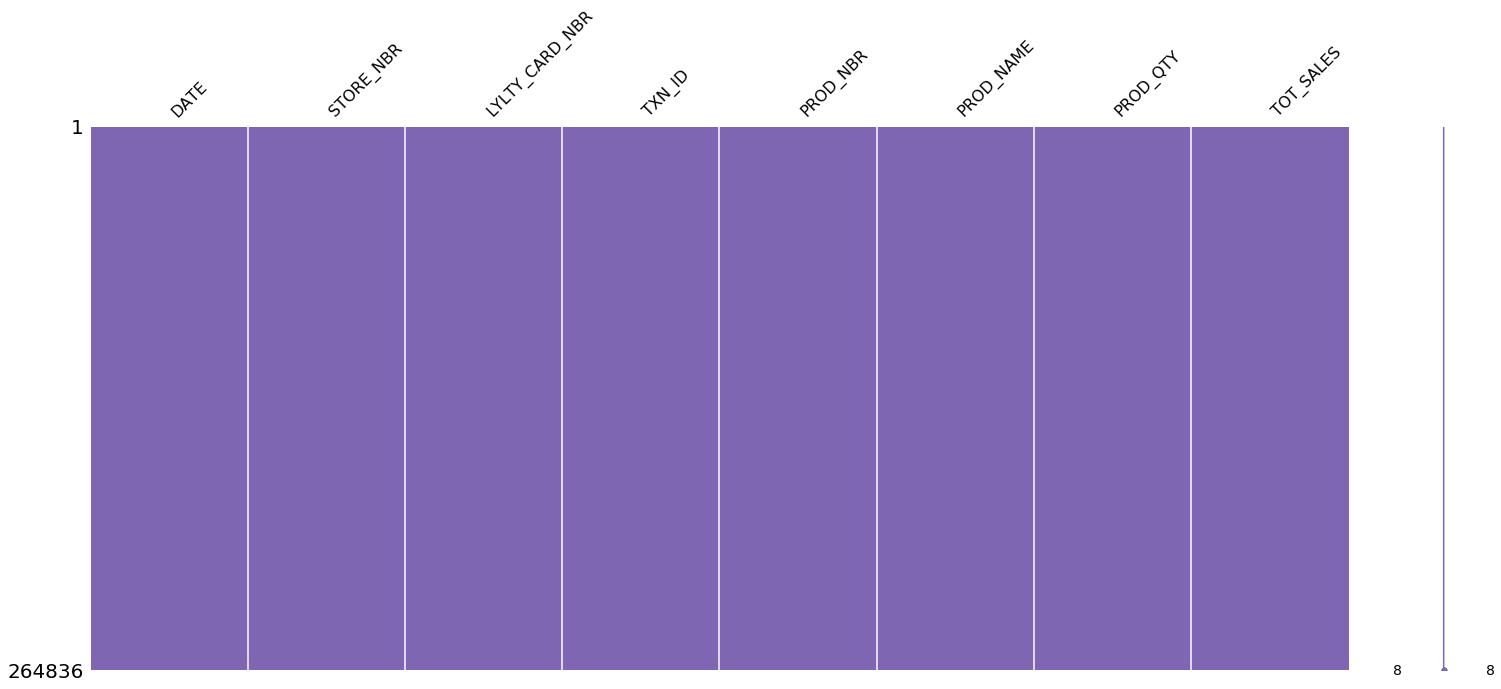

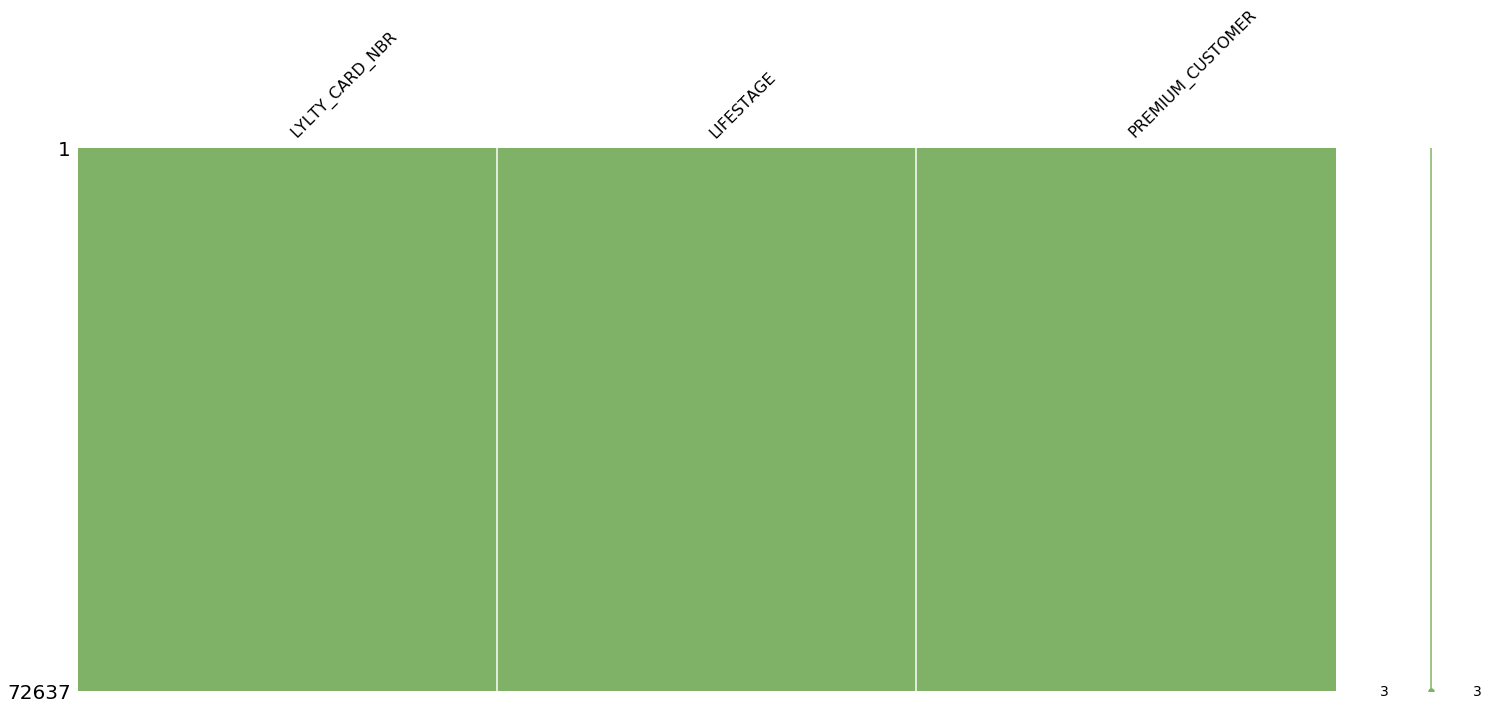

In [7]:
msno.matrix(transactions, color = (0.5, 0.4, 0.7))
msno.matrix(purchase_behav, color = (0.5, 0.7, 0.4))

From this initial view of the data it can be seen that there are no missing values, despite being quite large datasets. It looks like that, eventually, we will be joining the data frames on the customers' loyalty card numbers.

Now to look at the data in a bit more detail.

In [8]:
transactions.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17/10/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14/05/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20/05/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17/08/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18/08/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,19/05/2019,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,16/05/2019,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,16/05/2019,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,20/08/2018,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,18/08/2018,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [9]:
purchase_behav.head(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [10]:
transactions[transactions['PROD_NBR']==1]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
137,20/08/2018,186,186401,188768,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
752,21/08/2018,38,38142,34182,1,Smiths Crinkle Cut Chips Barbecue 170g,1,2.9
858,30/06/2019,43,43147,39609,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
946,10/04/2019,48,48131,43861,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
1603,23/02/2019,83,83186,83166,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
...,...,...,...,...,...,...,...,...
263710,11/10/2018,225,225101,225270,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
263742,08/08/2018,227,227073,228709,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
263863,16/10/2018,232,232022,235313,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
264468,26/06/2019,255,255370,254968,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8


### Findings:

* The purchase_behav data frame's 'LIFESTAGE' feature could be engineered to enable grouping by families and age
* The transactions data frame's DATE feature will need to be reformatted
* The transactions data frame's PROD_NBR feature refers to a specific crisp and its weight
* The transactions data frame's PROD_NAME feature will need to be engineered to split into pack size and brandname
* I am currently unsure of what the transactions data frame's TOT_SALES feature is showing exactly

### Amending the date feature
As can be seen above, the DATE column in the transactions data frame is of the object type.

I will also change the date format so it reads YYYY/MM/DD to avoid ambiguity.

In [11]:
transactions['DATE'] = pd.to_datetime(transactions['DATE'])

In [12]:
# check implementation
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
print(len(transactions['DATE'].unique()))
print(min(transactions['DATE'].unique()))
print(max(transactions['DATE'].unique()))

364
2018-01-07T00:00:00.000000000
2019-12-06T00:00:00.000000000


### Feature Engineering PROD_NAME

In [14]:
len(transactions['PROD_NAME'].unique())

114

There are 114 different crisp products. I will start by extracting the product weight by using a regular expression.

In [15]:
transactions['PROD_WEIGHT_G'] = transactions['PROD_NAME'].str.extract(r'(\d+)')

In [16]:
transactions['PROD_WEIGHT_G'] = transactions['PROD_WEIGHT_G'].astype(int)

I will use a similar method to create a brand code by taking the first word of the PROD_NAME field. 

In [17]:
transactions['BRAND_CODE'] = transactions['PROD_NAME'].str.extract(r'(\w+\W+)')

In [18]:
transactions['BRAND_CODE'] = transactions['BRAND_CODE'].str.rstrip(' ')

In [19]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,BRAND_CODE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [20]:
transactions['BRAND_CODE'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [21]:
len(transactions['BRAND_CODE'].unique())

29

It can be seen that there is some crossover in the brand codes (e.g. 'Infzns' and 'Infuzions' are both the same brand).

I will do some research to understand these brands better and make the appropriate adjustments.

In [22]:
brand = {'Red': 'RRD', 'WW': 'Woolworths', 'Natural': 'NCC', 'Infzns': 'Infuzions', 'Snbts': 'Sunbites', 'Grain': 'Grnwves', 'Smiths': 'Smith'}

In [23]:
transactions['BRAND_CODE'] = transactions['BRAND_CODE'].map(brand).fillna(transactions['BRAND_CODE'])

In [24]:
transactions['BRAND_CODE'].unique()

array(['NCC', 'CCs', 'Smith', 'Kettle', 'Old', 'Grnwves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Dorito', 'GrnWves', 'Tyrrells',
       'Cobs', 'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

Now I will look into the different words that are contained within the product names

In [25]:
words = pd.value_counts(transactions['PROD_NAME'].str.cat(sep=' ').split())

In [26]:
words.head(60)

175g          60561
Chips         49770
150g          41633
Kettle        41288
&             35565
Smiths        28860
Salt          27976
Cheese        27890
134g          25102
Pringles      25102
Doritos       24962
Crinkle       23960
110g          22387
Corn          22063
Original      21560
Cut           20754
Chip          18645
170g          18502
Salsa         18094
Chicken       15407
165g          15297
Sea           14145
Thins         14075
Sour          13882
Crisps        12607
330g          12540
Vinegar       12402
Chilli        12389
300g          12041
RRD           11894
Infuzions     11057
Supreme       10963
WW            10320
Cobs           9693
Popd           9693
Tortilla       9580
Tostitos       9471
Twisties       9454
Sensations     9429
El             9324
Paso           9324
Dip            9324
Old            9324
Sweet          7883
Lime           7852
Tomato         7669
Cream          7618
Thinly         7507
Tyrrells       6442
380g           6418


Having a look at the top 60 words in the PROD_NAME field, my main concern is the 'Salsa' and 'Dip' products; between them, they account for over 10% of the entries but are not crisp products. I will drop these entries.

In [27]:
transactions[transactions['PROD_NAME'].str.contains('Dip')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,BRAND_CODE
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,Old
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,Old
39,2018-08-18,55,55072,48878,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,150,Smith
71,2018-08-15,94,94233,93956,65,Old El Paso Salsa Dip Chnky Tom Ht300g,1,5.1,300,Old
83,2019-05-15,111,111487,113669,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,150,Smith
...,...,...,...,...,...,...,...,...,...,...
264670,2018-01-10,265,265066,263358,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,150,Smith
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,300,Old
264717,2018-10-25,266,266230,264056,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,150,Smith
264746,2018-10-18,268,268200,264616,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,150,Smith


In [28]:
transactions = transactions[~transactions['PROD_NAME'].str.contains('Dip')]

In [29]:
transactions = transactions[~transactions['PROD_NAME'].str.contains('Salsa')]

In [30]:
transactions.shape

(245304, 10)

### Exploratory Analysis into Newly-Derived Features

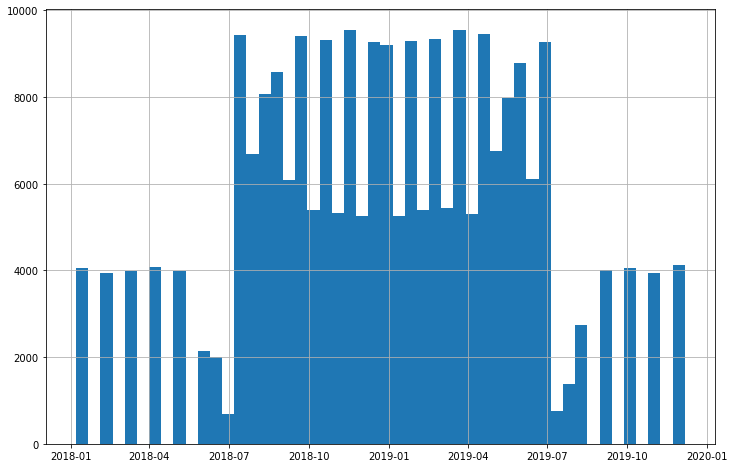

In [31]:
plt.figure(figsize=(12,8))
transactions['DATE'].hist(bins=50)

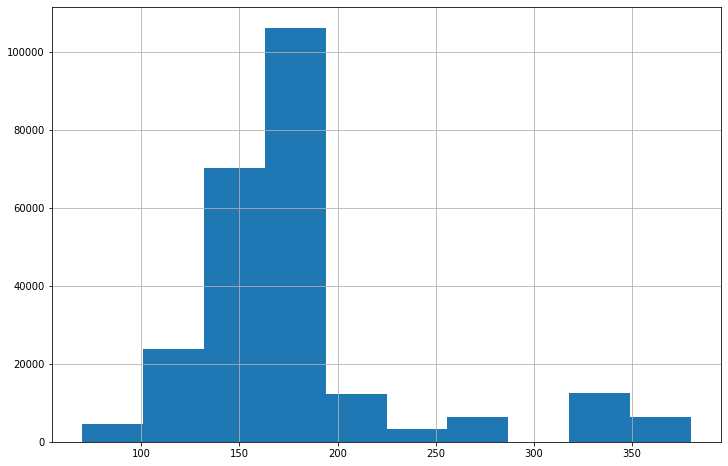

In [32]:
plt.figure(figsize=(12,8))
transactions['PROD_WEIGHT_G'].hist()

Product weights seem sensible; most are at around the 170g range.

[Text(0, 0, 'Kettle'),
 Text(0, 0, 'Smith'),
 Text(0, 0, 'Pringles'),
 Text(0, 0, 'Doritos'),
 Text(0, 0, 'RRD'),
 Text(0, 0, 'Infuzions'),
 Text(0, 0, 'Thins'),
 Text(0, 0, 'Woolworths'),
 Text(0, 0, 'Cobs'),
 Text(0, 0, 'Tostitos'),
 Text(0, 0, 'Twisties'),
 Text(0, 0, 'NCC'),
 Text(0, 0, 'Tyrrells'),
 Text(0, 0, 'Grnwves'),
 Text(0, 0, 'Cheezels'),
 Text(0, 0, 'CCs'),
 Text(0, 0, 'Dorito'),
 Text(0, 0, 'Sunbites'),
 Text(0, 0, 'Cheetos'),
 Text(0, 0, 'Burger'),
 Text(0, 0, 'GrnWves'),
 Text(0, 0, 'French')]

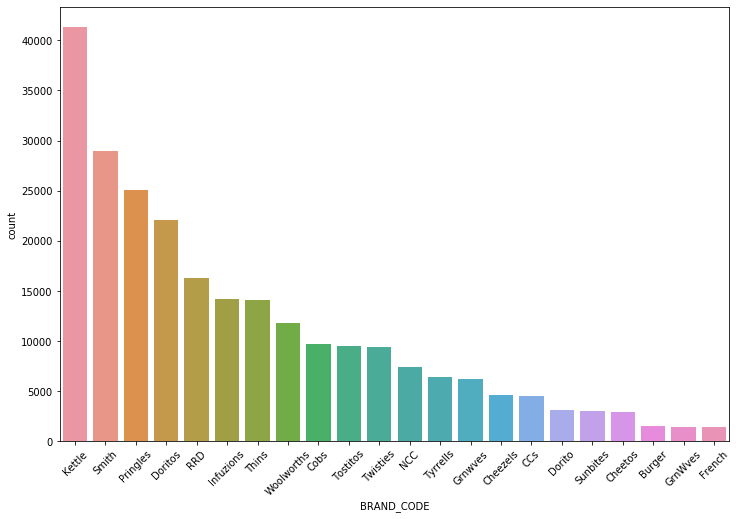

In [33]:
plt.figure(figsize=(12,8))
brand_chart = sns.countplot(data = transactions, x = 'BRAND_CODE', order = transactions['BRAND_CODE'].value_counts().index)
brand_chart.set_xticklabels(brand_chart.get_xticklabels(),rotation=45)

Kettle, Smith, Pringles and Doritos are clearly very popular brands, with Kettle accounting for nearly 10% of the dataset.